"Our mission is to build a machine learning model that estimates how much water a country will use annually, based on its population and average per-person water usage. This helps support sustainable water resource planning in urban settings."

In [29]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [57]:
# 📌 2. Load Dataset
df = pd.read_csv("/Users/mizeroreine/Desktop/docs/ALU/linear_regression_model/summative/linear_regression/Global Water Usage Statistics.csv")
print("🔍 Column names are:")
for col in df.columns:
    print(f"'{col}'")
df = df.rename(columns={
    'Yearly  Water Used (m³, thouand of liters)': 'Yearly_Water_Usage',
    'Daily Water Used Per Capita (liters)': 'Daily_Water_Usage'
})

df.columns = df.columns.str.strip()  # Just in case any whitespace
df.head()
print("✅ Columns after renaming:", df.columns.tolist())


🔍 Column names are:
'Country'
'Yearly  Water Used (m³, thouand of liters)'
'Daily Water Used Per Capita (liters)'
'Population'
✅ Columns after renaming: ['Country', 'Yearly_Water_Usage', 'Daily_Water_Usage', 'Population']


In [58]:
df['Yearly_Water_Usage'] = df['Yearly_Water_Usage'].astype(str).str.replace(",", "", regex=False).astype(float)
df['Daily_Water_Usage'] = df['Daily_Water_Usage'].astype(str).str.replace(",", "", regex=False).astype(float)
df['Population'] = df['Population'].astype(str).str.replace(",", "", regex=False).astype(float)

df.dropna(subset=['Yearly_Water_Usage', 'Daily_Water_Usage', 'Population'], inplace=True)
print("✅ Cleaned DataFrame shape:", df.shape)


✅ Cleaned DataFrame shape: (179, 4)


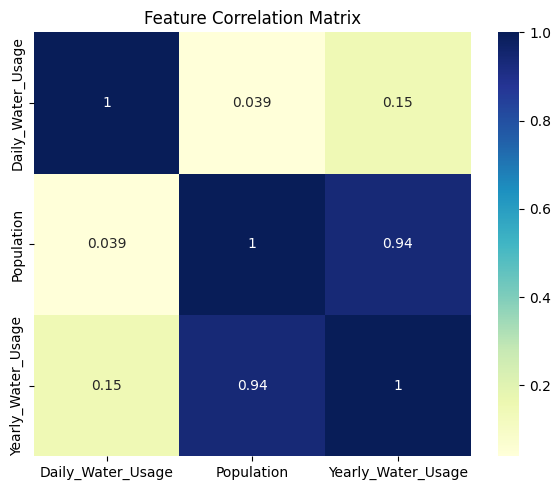

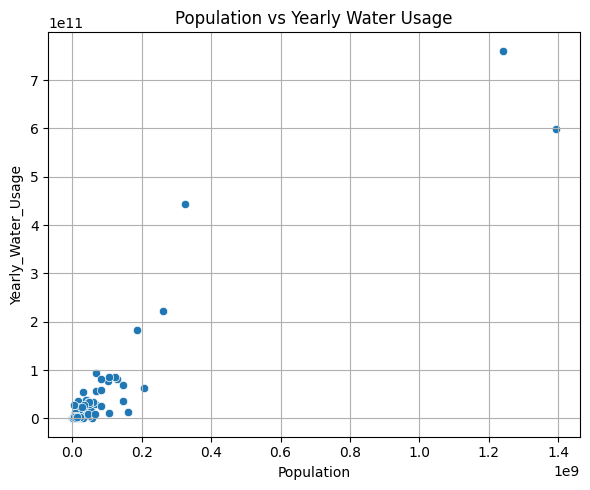

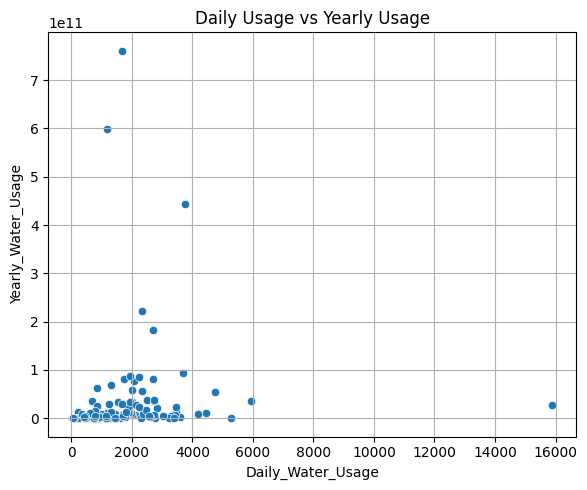

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[['Daily_Water_Usage', 'Population', 'Yearly_Water_Usage']].corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# 🔹 Population vs Yearly Usage
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Population', y='Yearly_Water_Usage')
plt.title("Population vs Yearly Water Usage")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 Daily Usage vs Yearly Usage
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Daily_Water_Usage', y='Yearly_Water_Usage')
plt.title("Daily Usage vs Yearly Usage")
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
# 📌 5. Prepare Features and Target
X = df[['Daily_Water_Usage', 'Population']]
y = df['Yearly_Water_Usage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
# 📌 6. Train Linear Regression (SGD)
sgd = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='invscaling', tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)

y_pred_sgd = sgd.predict(X_test_scaled)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"🔹 SGDRegressor:\nMSE = {mse_sgd:.2f}, R² = {r2_sgd:.2f}")


🔹 SGDRegressor:
MSE = 193749795251370393600.00, R² = 0.81


In [63]:
# 📌 7. Compare with Decision Tree and Random Forest

# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n🔹 Decision Tree:\nMSE = {:.2f}, R² = {:.2f}".format(mse_tree, r2_tree))
print("🔹 Random Forest:\nMSE = {:.2f}, R² = {:.2f}".format(mse_rf, r2_rf))



🔹 Decision Tree:
MSE = 302791900460277760000.00, R² = 0.70
🔹 Random Forest:
MSE = 305878475906268594176.00, R² = 0.69


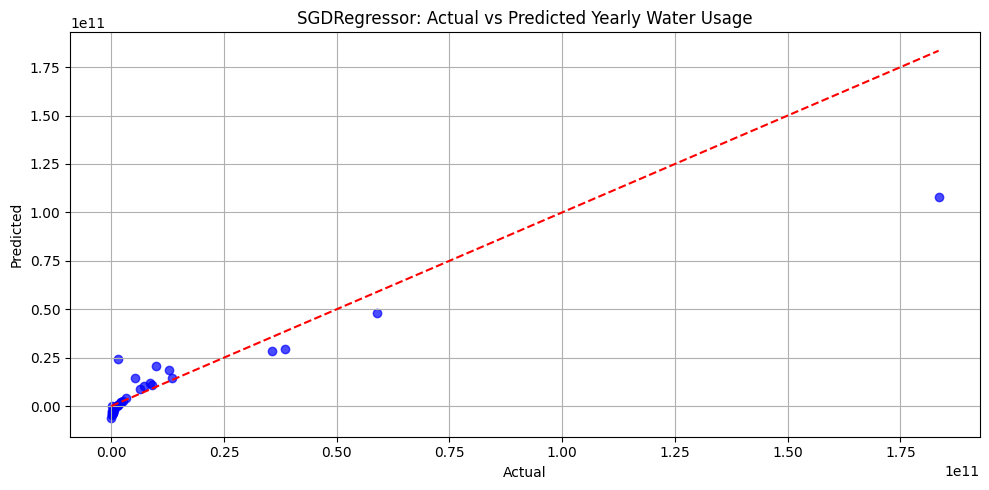

In [64]:
# 📌 8. Visualize Linear Regression Fit

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_sgd, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("SGDRegressor: Actual vs Predicted Yearly Water Usage")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
# 📌 9. Save Best Model (you can choose based on metrics)
best_model = rf  # or tree or sgd
joblib.dump(best_model, "best_water_usage_model.pkl")
joblib.dump(scaler, "feature_scaler.pkl")
print("✅ Model and scaler saved.")


✅ Model and scaler saved.


In [66]:
# 📌 10. Predict One Sample from Test Set
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = scaler.transform(sample)
predicted = best_model.predict(sample_scaled)
print("📈 Predicted Yearly Water Usage:", predicted[0])


📈 Predicted Yearly Water Usage: 9872000.0


/Users/mizeroreine/Desktop/docs/ALU/linear_regression_model/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/mizeroreine/Desktop/docs/ALU/linear_regression_model/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


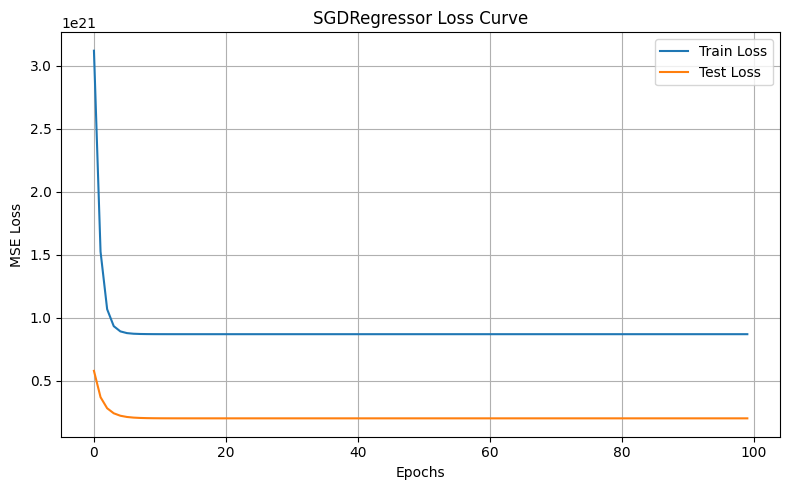

In [67]:
sgd = SGDRegressor(max_iter=1, eta0=0.01, learning_rate='invscaling', tol=None, warm_start=True, random_state=42)
train_losses = []
test_losses = []

for epoch in range(100):
    sgd.fit(X_train_scaled, y_train)
    y_train_pred = sgd.predict(X_train_scaled)
    y_test_pred = sgd.predict(X_test_scaled)
    train_losses.append(mean_squared_error(y_train, y_train_pred))
    test_losses.append(mean_squared_error(y_test, y_test_pred))

# Plotting loss curve
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("SGDRegressor Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


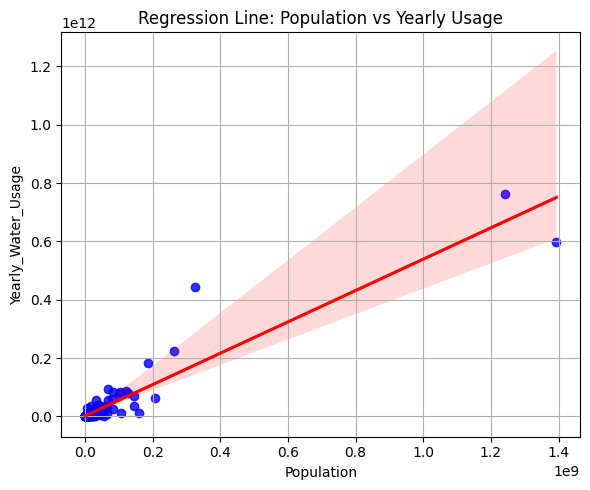

In [68]:
plt.figure(figsize=(6, 5))
sns.regplot(data=df, x='Population', y='Yearly_Water_Usage', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Line: Population vs Yearly Usage")
plt.grid(True)
plt.tight_layout()
plt.show()
